<a href="https://colab.research.google.com/github/Sriram-764/FML/blob/main/Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [11]:
data = pd.read_csv('Company_data.csv')
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [7]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
data.shape

(200, 4)

In [12]:
data.describe().loc['mean']

TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
Name: mean, dtype: float64

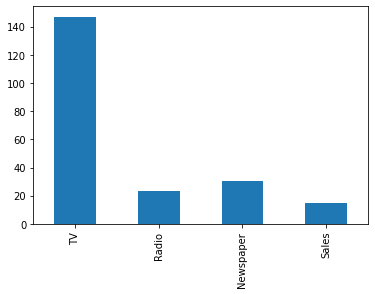

In [14]:
data.describe().loc['mean'].plot.bar()
plt.show()

In [ ]:
sns.distplot(data['Sales'], bins=30)
plt.scatter(x_train,y_train)plt.show()

In [19]:
print(data['TV'].corr(data['Sales']))
print(data['Radio'].corr(data['Sales']))
print(data['Newspaper'].corr(data['Sales']))

0.9012079133023306
0.3496310970076693
0.15796002615492621


correlation between TV and Sales is more so the input is TV column and the output the Sales column

In [54]:
x = data['TV'].values
y = data['Sales'].values
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)


In [90]:
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [92]:
reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

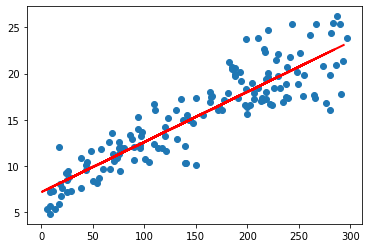

In [96]:
y_pred = reg.predict(x_test)
plt.scatter(x_train,y_train)
plt.plot(x_test,y_pred,linewidth="2",color="red")
plt.show()

In [94]:
ypred1 = reg.predict(x_train)
print("Performance measurement on train data")
print(f'MAE = {mean_absolute_error(y_train, ypred1)}')
print(f'MSE = {mean_squared_error(y_train, ypred1)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_train, ypred1))}')
print(f'R_2 = {r2_score(y_train, ypred1)}')

Performance measurement on train data
MAE = 1.7844011111656466
MSE = 5.082242554735654
RMSE = 2.2543829654110796
R_2 = 0.8032579738715725


In [95]:
y_pred = reg.predict(x_test)
print("Performance measurement on test data")
print(f'MAE = {mean_absolute_error(y_test, y_pred)}')
print(f'MSE = {mean_squared_error(y_test, y_pred)}')
print(f'RMSE = {np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R_2 = {r2_score(y_test, y_pred)}')

Performance measurement on test data
MAE = 1.982136028751018
MSE = 5.669959653648886
RMSE = 2.381167708005651
R_2 = 0.8281583789222331
